# instalar las versiones de los paquetes que necesitamos

In [1]:
!pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install mtcnn
!pip install keras_applications==1.0.4 --no-deps

!pip3 uninstall keras-nightly
!pip3 uninstall -y tensorflow
!pip3 install keras==2.1.6
!pip3 install tensorflow==1.15.0
!pip3 install h5py==2.10.0


  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-0xbibfuz
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-0xbibfuz
Found existing installation: keras-nightly 2.5.0.dev2021032900
Uninstalling keras-nightly-2.5.0.dev2021032900:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/keras/*
    /usr/local/lib/python3.7/dist-packages/keras_nightly-2.5.0.dev2021032900.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/keras/applications/resnet50.py
    /usr/local/lib/python3.7/dist-packages/keras/engine/network.py
    /usr/local/lib/python3.7/dist-packages/keras/engine/topology.py
    /usr/local/lib/python3.7/dist-packages/keras/initializers.py
    /usr/local/lib/python3.7/dist-packages/keras/layers/experimental/__init__.py
    /usr/local/lib/python3.7/dist-packages/keras/layers/experimental/preprocessing/__init__.py
    /usr/local/lib/python3.7/dist-packages/kera

# BAJAR una imagen de Sharon Stone:

In [2]:
!wget https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/sharon_stone1.jpg
!wget https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/channing_tatum.jpg
!wget https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/sharon_stone2.jpg
!wget https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/sharon_stone3.jpg

--2021-08-09 13:53:34--  https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/sharon_stone1.jpg
Resolving 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)... 108.161.188.228
Connecting to 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)|108.161.188.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73993 (72K) [image/jpeg]
Saving to: ‘sharon_stone1.jpg’

sharon_stone1.jpg   100%[===================>]  72.26K  --.-KB/s    in 0.006s  

2021-08-09 13:53:34 (11.6 MB/s) - ‘sharon_stone1.jpg’ saved [73993/73993]

--2021-08-09 13:53:34--  https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/channing_tatum.jpg
Resolving 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)... 108.161.188.228
Connecting to 3qeqpr26caki16dnhd19sv6by6v-wpen

In [ ]:
# Usamos MTCNN para segmentar la imagen y obtener la cara

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


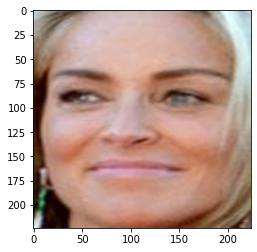

In [3]:
# ejemplo de 
import keras
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
 
def extract_face(filename, required_size=(224, 224)):
	pixels = pyplot.imread(filename)
	detector = MTCNN()
	# detectar caras en la imagen
	results = detector.detect_faces(pixels)
	# obtener bounding box
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# obtener cara
	face = pixels[y1:y2, x1:x2]
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array
 
# cargar y extraer cara
pixels = extract_face('sharon_stone1.jpg')
pyplot.imshow(pixels)
pyplot.show()

In [4]:
# Ejemplo de detección de caras con el modelo vggface
from keras import applications
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

# extraer una cara de la fotografía
def extract_face(filename, required_size=(224, 224)):
	# cargar la imagen de una archivo
	pixels = pyplot.imread(filename)
	# crear un detector usando pesos estándar
	detector = MTCNN()
	# detectar la cara en la imagen
	results = detector.detect_faces(pixels)
	# extraer la bounding box
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extraer la cara
	face = pixels[y1:y2, x1:x2]
	# redimensionar los píxeles al tamaño requerido
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# cargar la foto y extraer la cara
pixels = extract_face('sharon_stone1.jpg')
# convertir la cara en un array de ejemplos
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)
# preprocesar la imagen
samples = preprocess_input(samples, version=2)
# crear un modelo vggface
model = VGGFace(model='resnet50')
# predecir
yhat = model.predict(samples)
# convertir la predicción en nombres
results = decode_predictions(yhat)
# mostrar los resultados más probables
for result in results[0]:
	print('%s: %.3f%%' % (result[0], result[1]*100))














1351680/1346516 [==============================] - 0s 0us/step
b' Sharon_Stone': 99.574%
b' Noelle_Reno': 0.080%
b' Anita_Lipnicka': 0.027%
b' Elisabeth_R\xc3\xb6hm': 0.027%
b' Emma_Atkins': 0.019%


In [5]:
# verificación con el modelo VGGFace2
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

# extraer las caras y obtener los embeddings para una lista de archivos
def get_embeddings(filenames):
	# extraer caras
	faces = [extract_face(f) for f in filenames]
	# convertir en array de ejemplos
	samples = asarray(faces, 'float32')
	# preprocesar
	samples = preprocess_input(samples, version=2)
	# crear el modelo sin el TOP
	model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
	# predecir los embeddings
	yhat = model.predict(samples)
	return yhat

# determinar si el candidato es un match para para la cara conocida
def is_match(known_embedding, candidate_embedding, thresh=0.5):
	# calcular la distancia entre embeddings
	score = cosine(known_embedding, candidate_embedding)
	if score <= thresh:
		print('>la cara es un Match (%.3f <= %.3f)' % (score, thresh))
	else:
		print('>la cara NO es un Match (%.3f > %.3f)' % (score, thresh))

# definir archivos
filenames = ['sharon_stone1.jpg', 'sharon_stone2.jpg',
	'sharon_stone3.jpg', 'channing_tatum.jpg']
# obtener embeddings de las imágenes
embeddings = get_embeddings(filenames)
# definir la identidad de sharon stone
sharon_id = embeddings[0]
# verificar fotos de sharon stone
print('Positive Tests')
is_match(embeddings[0], embeddings[1])
is_match(embeddings[0], embeddings[2])
# verificar que no hay un match con otras personas
print('Negative Tests')
is_match(embeddings[0], embeddings[3])

94699520/94694792 [==============================] - 1s 0us/step
Positive Tests
>la cara es un Match (0.463 <= 0.500)
>la cara es un Match (0.300 <= 0.500)
Negative Tests
>la cara NO es un Match (0.709 > 0.500)
